---
title: Estimation using Monte Carlo methods
---

Let $X$ be a standard normal random variable. We will estimate $\mathbb{P}(X > 2)$ using four different methods. For each method, generate $N = 1000$ samples and report the estimate along with the relative error (std/mean).

1. **Proportion Method**: Generate $N$ independent standard normal random variables $X_1, \ldots, X_N$. Estimate $\mathbb{P}(X > 2)$ as the proportion of $X_i$'s greater than 2.
   
2. **Integration Method**: By symmetry, $\mathbb{P}(X > 2) = \frac{1}{2} - \mathbb{P}(0 \le X \le 2)$. Estimate $\mathbb{P}(0 \le X \le 2)$ by estimating the integral using uniform random samples in the interval $[0, 2]$.

3. **Antithetic Variates**: Use antithetic variates to reduce variance in the previous method.

4. **Importance Sampling**: Estimate $\mathbb{P}(X > 2)$ using importance sampling with an exponential proposal distribution shifted to the right by 2. Experiment with different values of $\lambda$ and report at least **two** different estimates.


5. **Comparison**: Compare the estimates from all five methods. Plot their running means on the same graph.


Proportion
Estimate: 0.018, Relative Error: -0.2087957977122579

Integration
Estimate: 0.02193674136584106, Relative Error: -0.03575322482484486

Antithetic Variates
Estimate: 0.023239967093274028, Relative Error: 0.021531090290403055

Importance Sampling, lambda = 1
Estimate: 0.023415312279475103, Relative Error: 0.029238526300026265

Importance Sampling, lambda = 2
Estimate: 0.02271680833460594, Relative Error: -0.001464765727476298



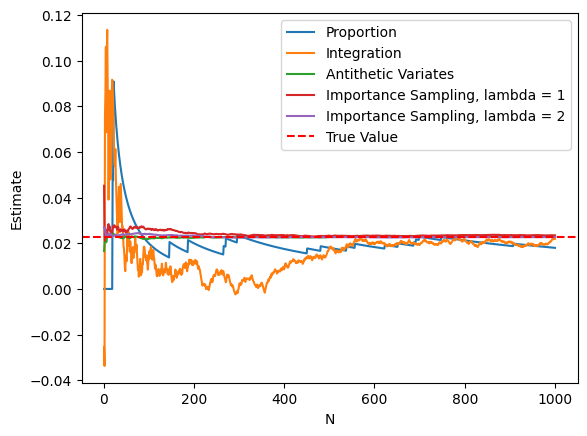

In [112]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Your code here
N = 1000
trueval = norm.cdf(-2)
error_func = lambda x: (x - trueval) / trueval

# Proportion
pnormals = np.random.normal(0, 1, N)
p = np.sum(pnormals > 2) / N
# actually standard error (normalized std)
# rel_error = np.sqrt(p * (1 - p) / N) / np.mean(normals)
print("Proportion")
print(f"Estimate: {p}, Relative Error: {error_func(p)}\n")

# Integration
uniforms = np.random.uniform(0, 2, N)
inorm_vals = norm.pdf(uniforms)
integral = 2/N * np.sum(inorm_vals)
p = 0.5 - integral
# rel_error = np.sqrt(4/N * np.var(norm_vals)) / np.mean(norm_vals)
print("Integration")
print(f"Estimate: {p}, Relative Error: {error_func(p)}\n")

# Antithetic Variates
uniforms = np.random.uniform(0, 2, N)
norm_vals_1 = norm.pdf(uniforms)
norm_vals_2 = norm.pdf(2 - uniforms)
asamples = (norm_vals_1 + norm_vals_2) / 2
integral = 2/N * np.sum(asamples)
p = 0.5 - integral
rel_error = np.sqrt(4/N * np.var(asamples)) / np.mean(asamples)
print("Antithetic Variates")
print(f"Estimate: {p}, Relative Error: {error_func(p)}\n")

# Importance
epdf = lambda x, _lambda: _lambda * np.exp(-_lambda * (x - 2))
def importance(_lambda):
    exps = np.random.exponential(scale=1/_lambda, size=N) + 2
    p = 1/N * np.sum(norm.pdf(exps) / epdf(exps, _lambda))
    # rel_error = np.sqrt(np.var(exps)) / np.mean(exps)
    print("Importance Sampling, lambda =", _lambda)
    print(f"Estimate: {p}, Relative Error: {error_func(p)}\n")
    return exps, _lambda
exps1, _lambda1 = importance(1)
exps2, _lambda2 = importance(2)

N_vec = np.arange(1, N+1)
propvec = np.cumsum(pnormals > 2) / N_vec
intvec = 0.5 - 2/N_vec * np.cumsum(inorm_vals)
antivec = 0.5 - 2/N_vec * np.cumsum(asamples)
impvec1 = 1/N_vec * np.cumsum(norm.pdf(exps1) / epdf(exps1, _lambda1))
impvec2 = 1/N_vec * np.cumsum(norm.pdf(exps2) / epdf(exps2, _lambda2))

plt.plot(N_vec, propvec, label="Proportion")
plt.plot(N_vec, intvec, label="Integration")
plt.plot(N_vec, antivec, label="Antithetic Variates")
plt.plot(N_vec, impvec1, label="Importance Sampling, lambda = 1")
plt.plot(N_vec, impvec2, label="Importance Sampling, lambda = 2")
plt.axhline(y=trueval, color='r', linestyle='--', label="True Value")
plt.xlabel("N")
plt.ylabel("Estimate")
plt.legend()
plt.show()

